In [ ]:
In this example, we will conduct a second order Global Sensitivity Analysis (GSA) on total cell cost to cell
components cost. Second order GSA assesses the cost by considering one factor and it also considers the 
coupling effects or interactioneffects between the various input parameters.

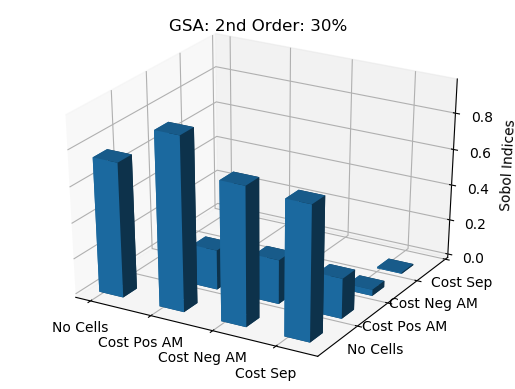

[0.7496516899114407, 0.22342109375819685, 0.02609198201275022, 0.006808488921112114][0.96457786127851, 0.7736753071199158, 0.7516172806305529, 0.24859442852981678, 0.22660745505600083, 0.03530457987265778]

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [1]:
include("../src/PBCM.jl")

cell_general = cell()
cell_design_op = cylindrical_cell_designer(cell_general)
cost = cost_default()
cell_general, cost = convert_all(cell_general, cost, mult)


using DiffEqSensitivity
using PyPlot

per = 30

no_cells_yr = 10
no_cells_yr_intrvl = [no_cells_yr*(1 - (per/100)) , no_cells_yr*(1 + (per/100))]

cost_pos_AM = 18.0
cost_pos_AM_intrvl = [cost_pos_AM*(1 - (per/100)) , cost_pos_AM*(1 + (per/100))]

cost_neg_AM = 12.5
cost_neg_AM_intrvl = [cost_neg_AM*(1 - (per/100)) , cost_neg_AM*(1 + (per/100))]

cost_sep = 1.1
cost_sep_intrvl    = [cost_sep  * (1 - (per/100)) , cost_sep * (1  + (per/100))]

function gsa_cost(arr)

    cost.general_costs.no_units_mfg   = converter(arr[1], mult.units_mfg)
    cost.cell_costs.cathode.AM[1]     = arr[2]
    cost.cell_costs.anode.AM[1]       = arr[3]
    cost.cell_costs.seperator_cost[1] = arr[4]

    dollars_kWh = cost_calc(cell_general, cost, system="Cell", cost_verbosity=0)[1]

    return dollars_kWh
end

# gsa_cost([0.25, 150.0, 130.0, 25.0, 19.0])

gsa_result = gsa(gsa_cost, Sobol(order = [2]), [no_cells_yr_intrvl, cost_pos_AM_intrvl, cost_neg_AM_intrvl, cost_sep_intrvl], N = 10000)


x = [0, 1, 2, 3, 1, 2, 3, 2, 3, 3]
y = [0, 0, 0, 0, 1, 1, 1, 2, 2, 3]

print("\n")
S1 = gsa_result.S1
S2 = gsa_result.S2
print(S1)
print(S2)

z = [S1[1],S2[1],S2[2],S2[3],S1[2],S2[4],S2[5],S1[3],S2[6],S1[4]]
clf()
r = bar3D(x, y, z*0, 0.4, 0.4, z)
xticks([0,1,2,3], ["No Cells","Cost Pos AM", "Cost Neg AM", "Cost Sep"])
yticks([1,2,3,4], ["No Cells","Cost Pos AM", "Cost Neg AM", "Cost Sep"])

title(string("GSA: 2nd Order: ", per, "%"))
zlabel("Sobol Indices")
figure(2)

The battery supply chain is quite complex and there are the prices are volatile. The plot above shows the sensitivity of cell cost to the prices of cell components, which helps battery manufacturers better identify the critical components and manage their supply chain. 